In [3]:
import pandas as pd
import math as m
import statsmodels.api as sm
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
data = pd.read_csv("unemployment.csv", index_col=['YEAR'])
GDP = pd.read_csv("GDP.csv", index_col=['YEAR'])

### Логарифмироавние

In [5]:
data['unemployment_log'] = list(map(lambda x: m.log(x), data.unemployment.values))
GDP['GDP_log'] = list(map(lambda x: m.log(x), GDP.GDP.values))

Text(0.5,1,'unemployment_log')

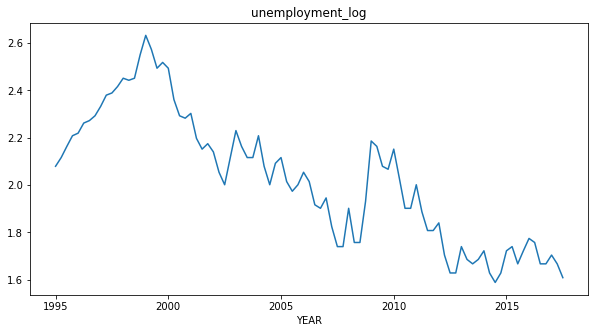

In [11]:
plt.figure(figsize(10,5))
data.unemployment_log.plot()
plt.title("unemployment_log")

Text(0.5,1,'GDP_log')

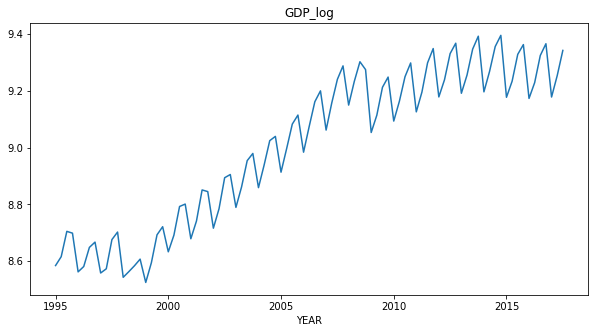

In [13]:
plt.figure(figsize(10,5))
GDP.GDP_log.plot()
plt.title("GDP_log")

### Сезонная декомпозиция

In [85]:
seasonal_decompose_GDP = sm.tsa.seasonal_decompose(GDP.GDP_log.values[:], freq=4)
seasonal_decompose_unemployment = sm.tsa.seasonal_decompose(data.unemployment_log.values[:], freq=4)

### сезонность

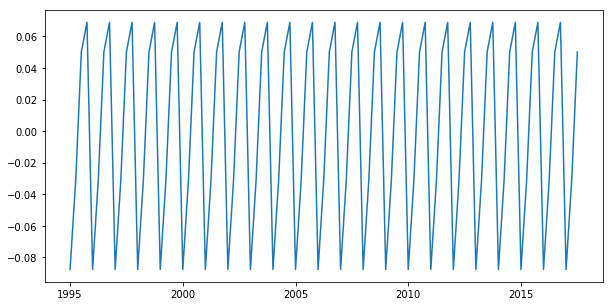

In [86]:
plt.plot(GDP.index.values ,seasonal_decompose_GDP.seasonal)

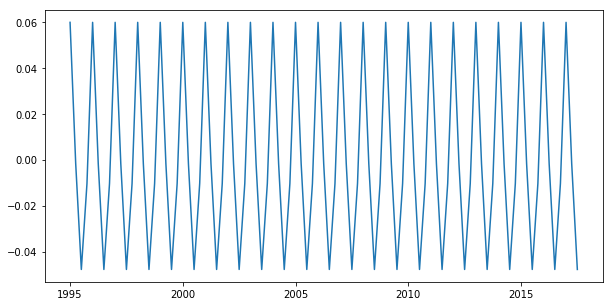

In [87]:
plt.plot(data.index.values ,seasonal_decompose_unemployment.seasonal)

### Тренд + цикличность

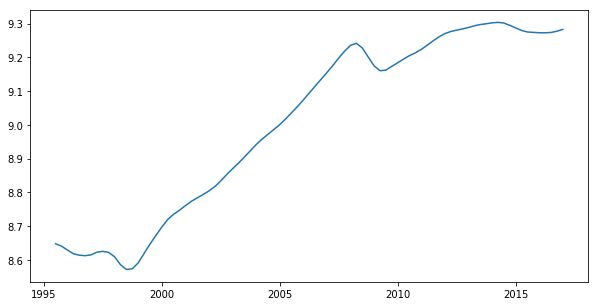

In [88]:
GDP['trend_and_cyclicity'] = seasonal_decompose_GDP.trend
plt.plot(GDP.index.values ,seasonal_decompose_GDP.trend)

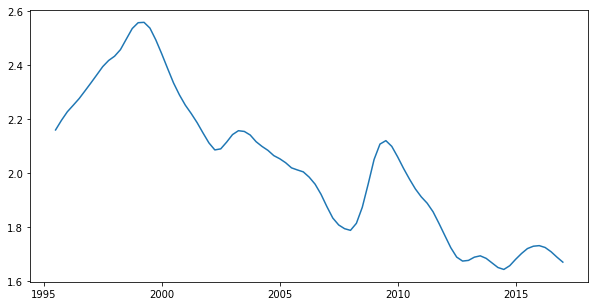

In [89]:
data['trend_and_cyclicity'] = seasonal_decompose_unemployment.trend
plt.plot(data.index.values ,seasonal_decompose_unemployment.trend)

### Только цикличность

In [90]:
data = data.iloc[2:-2]
GDP = GDP.iloc[2:-2]

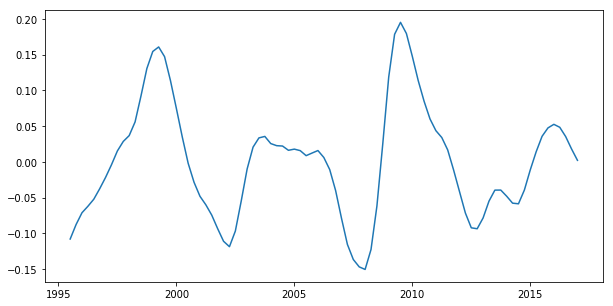

In [91]:
unemployment_cyclicity = sm.tsa.filters.hpfilter(data.trend_and_cyclicity.values, lamb=1600)[0]
plot(data.index.values, unemployment_cyclicity)

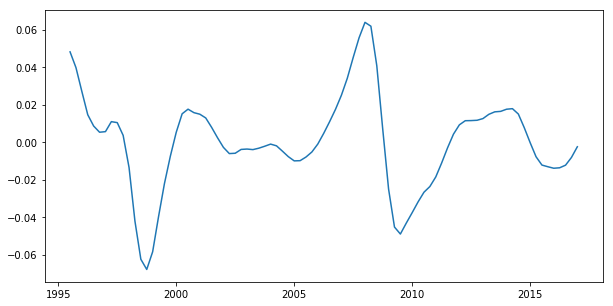

In [92]:
GDP_cyclicity = sm.tsa.filters.hpfilter(GDP.trend_and_cyclicity.values, lamb=1600)[0]
plot(data.index.values, GDP_cyclicity)

## Сохраняем результат

In [93]:
data_GDP = pd.DataFrame()
data_unemployment = pd.DataFrame()
data_GDP['GDP_cyclicity'] = GDP_cyclicity
data_unemployment['unemployment_cyclicity'] = unemployment_cyclicity
data_GDP.index = data.index.values
data_unemployment.index = data.index.values
data_GDP.to_csv('cleaned_GDP.csv')
data_unemployment.to_csv('cleaned_unemployment.csv')